In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

from src.data_loader import *

/Users/junginseo/opt/anaconda3/envs/dl_env/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = DataGenerator(data_type = 'db').data_search(ticker = 'AAPL')
df.sort_index(inplace=True)

기존 데이터 불러오기 성공


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
1992-12-11,0.511161,0.520089,0.511161,0.513393,0.422182,120187200.0
1992-12-14,0.513393,0.515625,0.506696,0.511161,0.420346,110510400.0
1992-12-15,0.506696,0.508929,0.495536,0.503348,0.413921,182537600.0
1992-12-16,0.502232,0.508929,0.486607,0.491071,0.403825,225926400.0
1992-12-17,0.493304,0.513393,0.493304,0.507813,0.417593,233867200.0
...,...,...,...,...,...,...
2022-10-28,148.199997,157.500000,147.820007,155.740005,155.740005,164762400.0
2022-10-31,153.160004,154.240005,151.919998,153.339996,153.339996,97943200.0
2022-11-01,155.080002,155.449997,149.130005,150.649994,150.649994,80379300.0


In [4]:
df['position'] = [-1 if df.shift(-1)['Adj Close'].iloc[i]< df['Adj Close'].iloc[i] and df.shift(1)['Adj Close'].iloc[i]< df['Adj Close'].iloc[i] 
              else 1 if df.shift(-1)['Adj Close'].iloc[i]> df['Adj Close'].iloc[i] and df.shift(1)['Adj Close'].iloc[i]> df['Adj Close'].iloc[i] 
              else 0 for i in range(len(df))]

In [5]:
df['Adj Close'].diff()

Datetime
1992-12-11          NaN
1992-12-14    -0.001835
1992-12-15    -0.006425
1992-12-16    -0.010096
1992-12-17     0.013768
                ...    
2022-10-28    10.940002
2022-10-31    -2.400009
2022-11-01    -2.690002
2022-11-02    -5.619995
2022-11-03    -6.149994
Name: Adj Close, Length: 7530, dtype: float64

In [6]:
df['trend'] = [1 if df['Adj Close'].diff().iloc[i] > 0 else 0 for i in range(len(df))]

In [7]:
df['trend'].value_counts()

1    3832
0    3698
Name: trend, dtype: int64

Text(0.5, 1.0, 'Price')

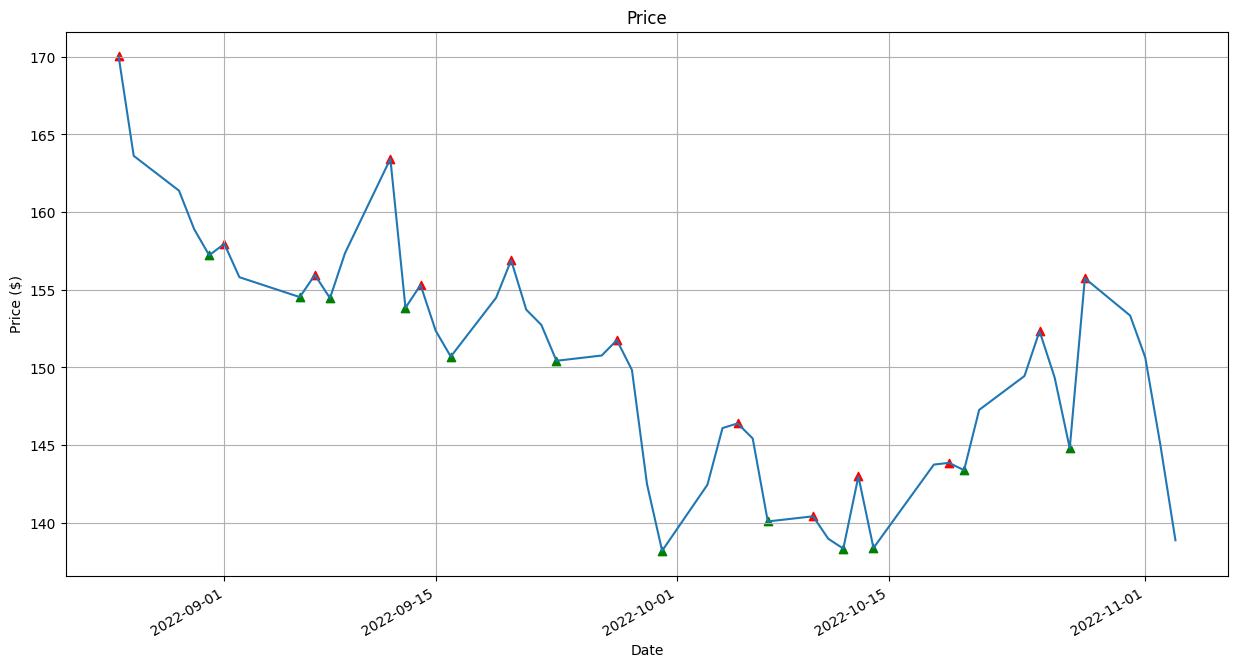

In [8]:
dummy_df = df.iloc[-50:]
# 그림 사이즈 설정
plt.figure(figsize=( 15,8))

# 종가 기준으로 차트를 그림
dummy_df['Adj Close'].plot(grid=True)

# position이 1 인경우 초록색으로 해당 종가에 표시
plt.scatter(dummy_df.loc[df.position == 1].index, dummy_df['Adj Close'][dummy_df.position == 1],
            color='green', 
            label='Buy', 
            marker = '^', 
            alpha=1)

# position이 -1 인경우 빨간색으로 해당 종가에 표시
plt.scatter(dummy_df.loc[dummy_df.position == -1].index, dummy_df['Adj Close'][dummy_df.position == -1],
            color='red', 
            label='Sell', 
            marker = '^', 
            alpha=1)

# # trend이 1 인경우 초록색으로 해당 종가에 표시
# plt.scatter(dummy_df.loc[df.trend == 1].index, dummy_df['Adj Close'][dummy_df.trend == 1],
#             color='pink', 
#             label='up', 
#             marker = 'o', 
#             alpha=0.5)

# # position이 -1 인경우 빨간색으로 해당 종가에 표시
# plt.scatter(dummy_df.loc[dummy_df.trend == 0].index, dummy_df['Adj Close'][dummy_df.trend == 0],
#             color='blue', 
#             label='down', 
#             marker = 'o', 
#             alpha=0.5)


plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.title('Price')

In [9]:
from src import candlestick2img



In [10]:
aapl = DataGenerator('db').data_search('AAPL')
aapl.sort_index(inplace=True)

기존 데이터 불러오기 성공


In [11]:

# TASLS_LS = [detect_evening_star, detect_morning_star, detect_shooting_star, 
#             detect_hanging_man, detect_bullish_engulfing, detect_bearish_engulfing,
#             detect_hammer, detect_inverted_hammer, detect_bullish_harami,
#             detect_bearish_harami]

# load raw ohlc data
# data = pd.read_csv('./data/eurusd_2010_2017_raw.csv')
data = candlestick2img.rename(aapl)

# calculate features & slope
data = candlestick2img.process_data(data, slope=True)

# calculate trend (depend on slopes)
data = candlestick2img.process_data(data, slope=False)

# save current data
# data.to_csv('./data/eurusd_2010_2017_process.csv', index=False)

# detect with customized rules
data = candlestick2img.detect_all(data, pro_num=4)
# data.to_csv('./data/eurusd_2010_2017_patterns.csv', index=False)
candlestick2img.detection_result(data)

100%|██████████| 7529/7529 [00:02<00:00, 2838.65it/s]


[ Info ] : detecting evening star


100%|██████████| 134/134 [00:00<00:00, 15186.08it/s]


[ Info ] : detecting morning star


100%|█████████▉| 3226/3227 [00:00<00:00, 16064.86it/s]


[ Info ] : detecting shooting star


100%|██████████| 134/134 [00:00<00:00, 18434.08it/s]


[ Info ] : detecting hanging man


100%|██████████| 134/134 [00:00<00:00, 33827.07it/s]


[ Info ] : detecting bullish engulfing


100%|█████████▉| 3226/3227 [00:00<00:00, 26623.11it/s]


[ Info ] : detecting bearish engulfing


100%|██████████| 134/134 [00:00<00:00, 27640.24it/s]


[ Info ] : detecting hammer


100%|██████████| 3227/3227 [00:00<00:00, 38254.08it/s]


[ Info ] : detecting inverted hammer


100%|█████████▉| 3226/3227 [00:00<00:00, 19350.98it/s]


[ Info ] : detecting bullish harami


100%|█████████▉| 3226/3227 [00:00<00:00, 14051.20it/s]


[ Info ] : detecting bearish harami


100%|██████████| 134/134 [00:00<00:00, 13248.08it/s]


[ Info ] : number of evening star is 1
[ Info ] : number of morning star is 3
[ Info ] : number of shooting star is 1
[ Info ] : number of hanging man is 2
[ Info ] : number of bullish engulfing is 2
[ Info ] : number of bearish engulfing is 0
[ Info ] : number of hammer is 2
[ Info ] : number of inverted hammer is 3
[ Info ] : number of bullish harami is 0
[ Info ] : number of bearish harami is 2


In [18]:
data

,open,high,low,close,adj close,volume,diff,direction,ushadow_width,lshadow_width,...,evening,morning,shooting_star,hanging_man,bullish_engulfing,bearish_engulfing,hammer,inverted_hammer,bullish_harami,bearish_harami
6,0.520089,0.535714,0.517857,0.532366,0.437784,256065600.0,-0.082305,-1.0,0.015625,0.014509,...,0,0,0,0,0,0,0,0,0,0
7,0.533482,0.546875,0.533482,0.541295,0.445126,280168000.0,-0.088356,-1.0,0.013393,0.007813,...,0,0,0,0,0,0,0,0,0,0
8,0.537946,0.540179,0.529018,0.533482,0.438701,112336000.0,-0.099245,-1.0,0.002233,0.004464,...,0,0,0,0,0,0,0,0,0,0
9,0.535714,0.535714,0.526786,0.526786,0.433195,45964800.0,-0.102519,-1.0,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
10,0.529018,0.533482,0.529018,0.531250,0.436866,70448000.0,-0.092152,-1.0,0.004464,0.002232,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7524,148.199997,157.500000,147.820007,155.740005,155.740005,164762400.0,7.540009,1.0,1.759995,0.379990,...,0,0,0,0,0,0,0,0,0,0
7525,153.160004,154.240005,151.919998,153.339996,153.339996,97943200.0,0.179993,1.0,0.900009,1.240005,...,0,0,0,0,0,0,0,0,0,0
7526,155.080002,155.449997,149.130005,150.649994,150.649994,80379300.0,-4.430008,-1.0,0.369995,1.519989,...,0,0,0,0,0,0,0,0,0,0
7527,148.949997,152.169998,145.000000,145.029999,145.029999,93604600.0,-3.919998,-1.0,3.220001,0.029999,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from keras.models import load_model
import pandas as pd
import numpy as np

# customized utilities


def save_csv(gen_imgs, idx):
    # inverse to time-series
    temp = np.zeros((gen_imgs.shape[0], 10, 4))
    for i in range(gen_imgs.shape[0]):
        for c in range(gen_imgs.shape[-1]):
            gen_imgs_each = gasf2ts(gen_imgs[i, :, :, c])
            temp[i, :, c] = gen_imgs_each
    gen_imgs = temp

    candle_open = (gen_imgs[:, :, 0]).tolist()
    candle_high = (gen_imgs[:, :, 1]).tolist()
    candle_low = (gen_imgs[:, :, 2]).tolist()
    candle_close = (gen_imgs[:, :, 3]).tolist()
    
    df = pd.DataFrame(columns = ['open', 'high', 'low', 'close'])
    for i in range(len(candle_open)):
        zippedList =  list(zip(candle_open[i], candle_high[i], candle_low[i], candle_close[i]))
        df1 = pd.DataFrame(zippedList, columns = ['open', 'high', 'low', 'close']) 
        df = pd.concat([df, df1], axis=0)

    if idx == 1:
        global all_df
        all_df = df
    else:
        all_df = pd.concat([all_df, df], axis=0)

    if idx == 8:
        # all_df.to_excel('new_data/cvae_label_data.xlsx', index=False)
        all_df.to_excel('new_data/adversarial_fakedata.xlsx', index=False)


def sample_images(label, decoder):
        v = np.zeros((50, 101))
        z = np.random.normal(size=(50, 100))
        v[:, :100] = z
        v[:, -1] = label
        gen_imgs = decoder.predict(v)
        gen_imgs = gen_imgs.reshape(gen_imgs.shape[0], 10, 10, 4)
        save_csv(gen_imgs, label)


def main(params):
    decoder = load_model(params['cvae_decoder'])
    for label in range(1, 9):
        sample_images(label, decoder)


if __name__ == '__main__':
    PARAMS = dict()
    PARAMS['cvae_decoder'] = './models/cvae_decoder.h5'

    main(PARAMS)